# BM32 vs ID01 reference frames

In [3]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Circle, PathPatch
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d
from LT_fitfile_parser import LT_fitfile
from matplotlib.path import Path
import matplotlib.cm as cm
import matplotlib as mpl
import xrayutilities as xu
import id01lib.xrd.geometries as geometries
from math import *
import numpy as np
from matplotlib import pyplot
import pylab as pl
import collections
import math

## Case of orientation matrix defined at BM32
### Load fitted orientation matrix from BM32

In [4]:
wdir = '/data/id01/inhouse/richard/EBS_fall_2020/Ni_superalloy/'
fitfile = 'C_fit_1_dat_test_mesh_0408_LT_0_fitnb_1.fit' # for sample C

<IPython.core.display.Javascript object>


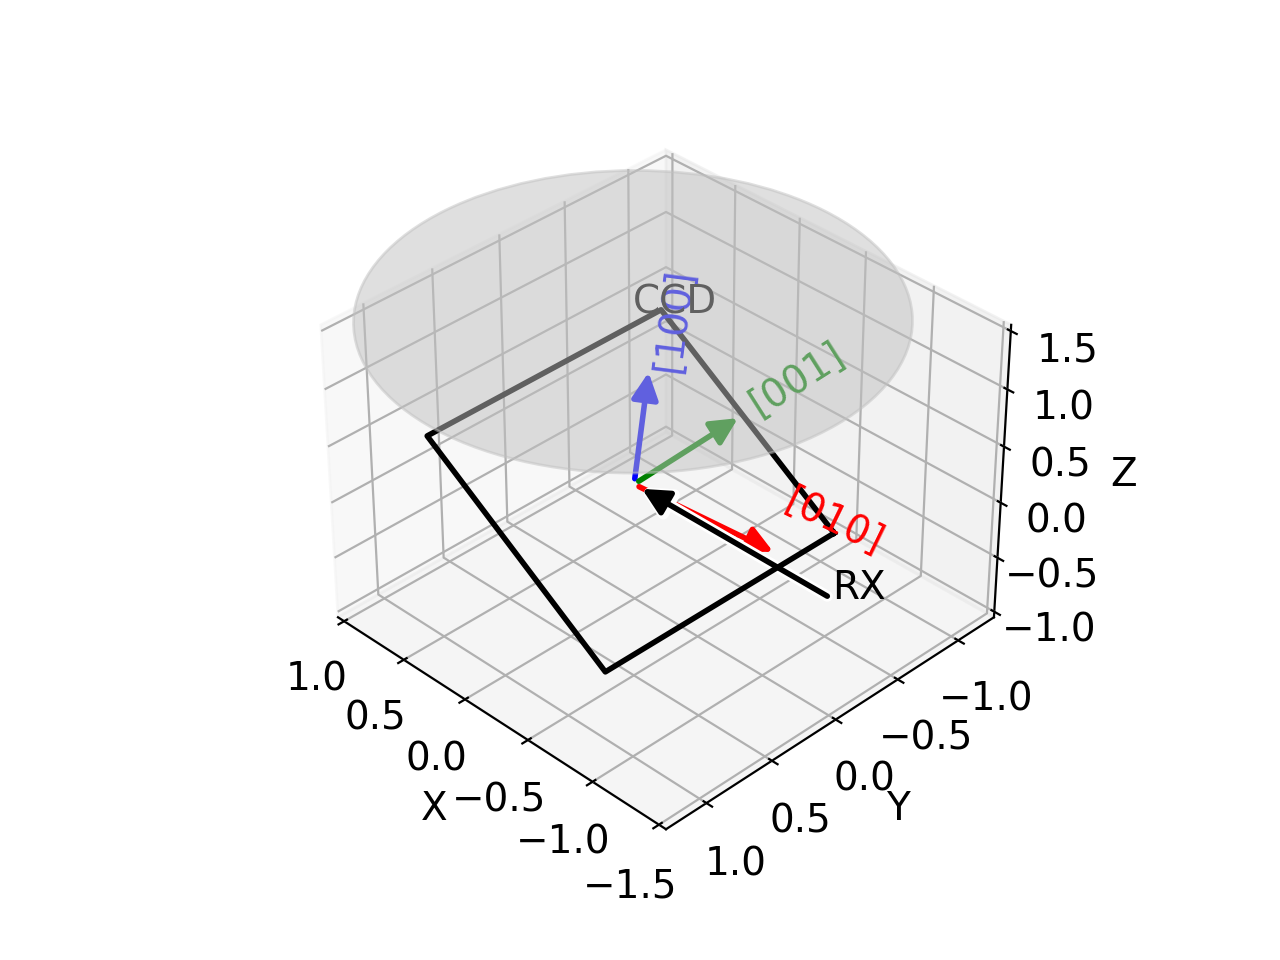

could not read line #Umatrix in q_lab= (UB) B0 G* 
could not read line [[-0.02551986  -0.992532561  0.119280564]
could not read line  [-0.095932267 -0.116337267 -0.988565951]
could not read line  [ 0.99506067  -0.036670919 -0.092246987]]
could not read line #Bmatrix in q_lab= (UB) B0 G* 
could not read line [[  1.000018807000000e+00   3.468700000000000e-04  -1.210560000000000e-04]
could not read line  [  0.000000000000000e+00   9.999946600000000e-01  -3.122300000000000e-04]
could not read line  [ -0.000000000000000e+00  -0.000000000000000e+00   1.000608027000000e+00]]
could not read line #(B-I)*1000 
could not read line [[ 0.019  0.347 -0.121]
could not read line  [ 0.    -0.005 -0.312]
could not read line  [-0.    -0.     0.608]]
could not read line #HKL coord. of lab and sample frame axes :
could not read line #HKLx_lab_LT	[-0.025 -1.     0.12 ]
could not read line #HKLy_lab_LT	[-0.097 -0.118 -1.   ]
could not read line #HKLz_lab_LT	[ 1.    -0.037 -0.093]
could not read line #HKLx_sa

In [5]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 14

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cube_side = 1.5
ax.set_xlim([-cube_side,1])
ax.set_ylim([-1.25,1.25])
ax.set_zlim([-1,cube_side])
ax.view_init(elev=35, azim=135)
fontsize = 14


# UB Matrix
ff = LT_fitfile(os.path.join(wdir,fitfile))

UB = ff.UB

astar = UB[:,0]
bstar = UB[:,1]
cstar = UB[:,2]

astar = ff.astar_prime/np.linalg.norm(ff.astar_prime)
bstar = ff.bstar_prime/np.linalg.norm(ff.bstar_prime)
cstar = ff.cstar_prime/np.linalg.norm(ff.cstar_prime)

arrow_astar = Arrow3D([0,astar[0]],[0,astar[1]],[0,astar[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="b")
arrow_bstar = Arrow3D([0,bstar[0]],[0,bstar[1]],[0,bstar[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="r")
arrow_cstar = Arrow3D([0,cstar[0]],[0,cstar[1]],[0,cstar[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="g")

ax.text(astar[0],astar[1],astar[2], "[100]", color='b', zorder=2,fontsize=fontsize,zdir=tuple(astar))
ax.text(bstar[0],bstar[1],bstar[2], "[010]", color='r', zorder=2,fontsize=fontsize,zdir=tuple(bstar))
ax.text(cstar[0],cstar[1],cstar[2], "[001]", color='g', zorder=2,fontsize=fontsize,zdir=tuple(cstar))

for artist in [arrow_astar,
               arrow_bstar,
               arrow_cstar]:
  ax.add_artist(artist)

# incoming X-ray
RX_origin = np.array([-cube_side,0,0])
arrow_rx    = Arrow3D([RX_origin[0],0],[RX_origin[1],0],[RX_origin[2],0], mutation_scale=20, lw=4, arrowstyle="-|>", color="w")
ax.add_artist(arrow_rx)
arrow_rx    = Arrow3D([RX_origin[0],-0.025],[RX_origin[1],0],[RX_origin[2],0], mutation_scale=20, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(arrow_rx)

ax.text(RX_origin[0],RX_origin[1],RX_origin[2], "RX", color='k',fontsize=fontsize)

#sample holder 
sf = 0.9 # scale factor
tz = -0.01 # translation along z
x = [-np.cos(40.*np.pi/180)*sf   , np.cos(40.*np.pi/180)*sf   , np.cos(40.*np.pi/180)*sf   ,-np.cos(40.*np.pi/180)*sf   ,-np.cos(40.*np.pi/180)*sf   ]
y = [-1              *sf         ,-1              *sf         , 1              *sf   , 1              *sf   ,-1              *sf   ]
z = [-np.sin(40.*np.pi/180)*sf+tz, np.sin(40.*np.pi/180)*sf+tz, np.sin(40.*np.pi/180)*sf+tz,-np.sin(40.*np.pi/180)*sf+tz,-np.sin(40.*np.pi/180)*sf+tz]
ax.plot(x,y,z,'k-')


#CCD
CCD_center = np.array([0,0,1.5])
CCD_radius = 1.5
p = Circle((CCD_center[0], CCD_center[1]),CCD_radius , color='silver', alpha=0.5,  zorder=10)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=CCD_center[2], zdir="z")
ax.text(CCD_center[0],CCD_center[1],CCD_center[2], "CCD", color='k', zorder=2,fontsize=fontsize)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig(os.path.join(wdir,'3Dplot_setup.png'))
plt.show()

In [6]:
print(UB)

[[-0.02552034 -0.99253614  0.11966612]
 [-0.09593406 -0.11637005 -0.98911883]
 [ 0.99507939 -0.0363256  -0.09241198]]


In [9]:
th_z = -90 # (-180 deg. + 90 deg.)
th_y = 40
Rz = [[np.cos(th_z*np.pi/180), -np.sin(th_z*np.pi/180), 0],[np.sin(th_z*np.pi/180), np.cos(th_z*np.pi/180), 0],[0,0,1]]
Ry = [[np.cos(th_y*np.pi/180), 0, np.sin(th_y*np.pi/180)],[0,1,0],[-np.sin(th_y*np.pi/180), 0, np.cos(th_y*np.pi/180)]]

R_u = np.dot(Rz,Ry)
print(Rz)
print(Ry)
print(R_u)

[[6.123233995736766e-17, 1.0, 0], [-1.0, 6.123233995736766e-17, 0], [0, 0, 1]]
[[0.766044443118978, 0, 0.6427876096865393], [0, 1, 0], [-0.6427876096865393, 0, 0.766044443118978]]
[[ 4.69066938e-17  1.00000000e+00  3.93593894e-17]
 [-7.66044443e-01  6.12323400e-17 -6.42787610e-01]
 [-6.42787610e-01  0.00000000e+00  7.66044443e-01]]


In [11]:
R_ID01 = np.dot(R_u, UB)
print(R_ID01)

[[-0.09593406 -0.11637005 -0.98911883]
 [-0.62007498  0.78367644 -0.03226829]
 [ 0.77867919  0.61016291 -0.14771158]]


In [13]:
# Case of a rotation matrix defined at the ID01 beamline
'''
R_ID01 = [[-1./np.sqrt(6),2./np.sqrt(6),-1./np.sqrt(6)],
          [-1./np.sqrt(2),0,1./np.sqrt(2)],
          [1./np.sqrt(3),1./np.sqrt(3),1./np.sqrt(3)]]
'''

'\nR_ID01 = [[-1./np.sqrt(6),2./np.sqrt(6),-1./np.sqrt(6)],\n          [-1./np.sqrt(2),0,1./np.sqrt(2)],\n          [1./np.sqrt(3),1./np.sqrt(3),1./np.sqrt(3)]]\n'

In [16]:
### find the correct orientation
energy = 8994
#lattice = [3.5932,3.5932,3.5932,90,90,90] # lattice parameter of Ni super-alloy
lattice = [3.7235,3.7235,3.7235,90,90,90] # lattice of Pt(50)Ni(50)

UB = R_ID01

B_matrix = [[1/lattice[0], 0, 0], [0,    1/lattice[1],    0], [0,   0,    1/lattice[2]]]

UBB0 = np.dot(UB,B_matrix)


def get_Q(h,k,l, UB=UBB0):
    Q = np.dot(UB,[h,k,l]) * 2 * pl.pi
    return pl.array(list(Q), dtype=float)


id01 = geometries.ID01psic()
qconv = id01.getQconversion()
hxrd = xu.HXRD([1,0,0], [0,0,1], en=energy, qconv=qconv)

bounds = collections.OrderedDict()
bounds["mu"]  = 0
bounds["eta"] = 18.7
bounds["phi"] = (-100, 100)
bounds["rhx"] = 0
bounds["rhy"] = 0
bounds["rhz"] = 0
bounds["nu"]  = (0,60)
bounds["delta"] = (0, 80)

motors = list(bounds)

Rlist = [1]
_UB = UBB0

for i, R in enumerate(Rlist):
    result = xu.Q2AngFit(get_Q(1,-1,0, _UB),#xu.Q2AngFit(get_Q(Rlist[i], _UB),
                         hxrd,
                         bounds.values(),
                         startvalues=[0,90,0,0,0,0,0,100])

    
    res = result[0]
    for m in id01.usemotors:
        print("%s=%f    "%(m, res[motors.index(m)]))
    
    with open("angles.txt", "a") as fh:
        if not fh.tell():
            fh.write("Reflection  Intensity   ")
            for m in id01.usemotors:
                fh.write("%8s"%m)
            fh.write(os.linesep)
        fh.write(str(Rlist))  
        for m in id01.usemotors:
            fh.write("%12.3f"%res[motors.index(m)])
        fh.write(os.linesep)

eta=18.700000    
phi=14.583971    
nu=30.328403    
delta=1.116605    


In [18]:
# check the twotheta value
print(math.acos(math.cos(res[motors.index("delta")]*np.pi/180)*math.cos(res[motors.index("nu")]*np.pi/180))*180/np.pi)

30.346995626264448
